<a href="https://colab.research.google.com/github/AdilPasha2/CODSOFT/blob/main/task1_movie_genre_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re  # for pattern matching and text manipulation.
import string
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
train_data = pd.read_csv("train_data.txt", sep=':::', names=["title", "genre", "description"], engine='python')
test_data = pd.read_csv("test_data.txt", sep=':::', names=["title", "description"], engine='python')
train_data.head()


,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
train_data.shape

(54214, 3)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [10]:
test_data.head()

,title,description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [11]:
train_data.isnull().sum()

,0
title,0
genre,0
description,0


In [12]:
train_data.duplicated().sum()

0

In [13]:
test_data.shape

(54200, 2)

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54200 non-null  object
 1   description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


ANALYSIS

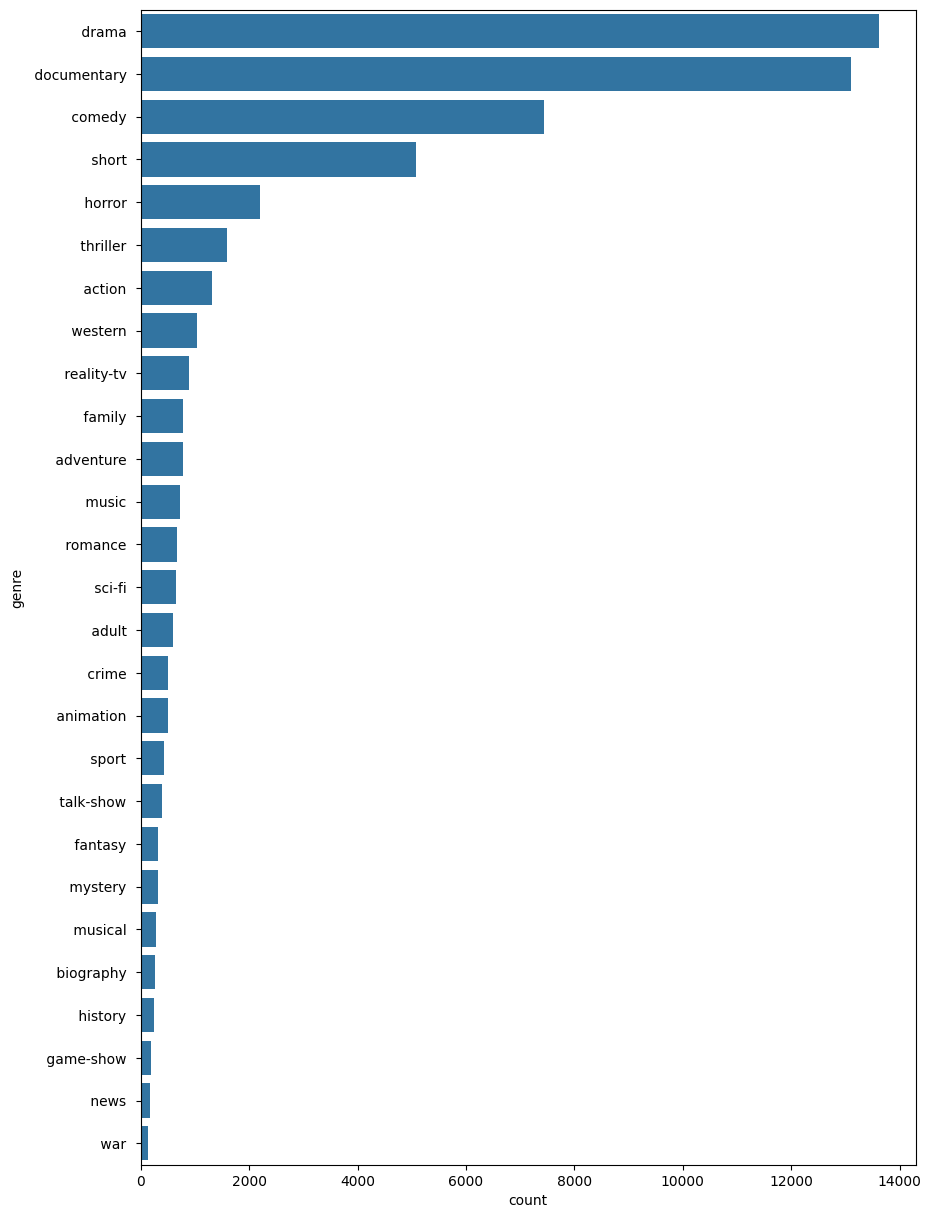

In [15]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="genre", order= train_data["genre"].value_counts().index)
plt.show()

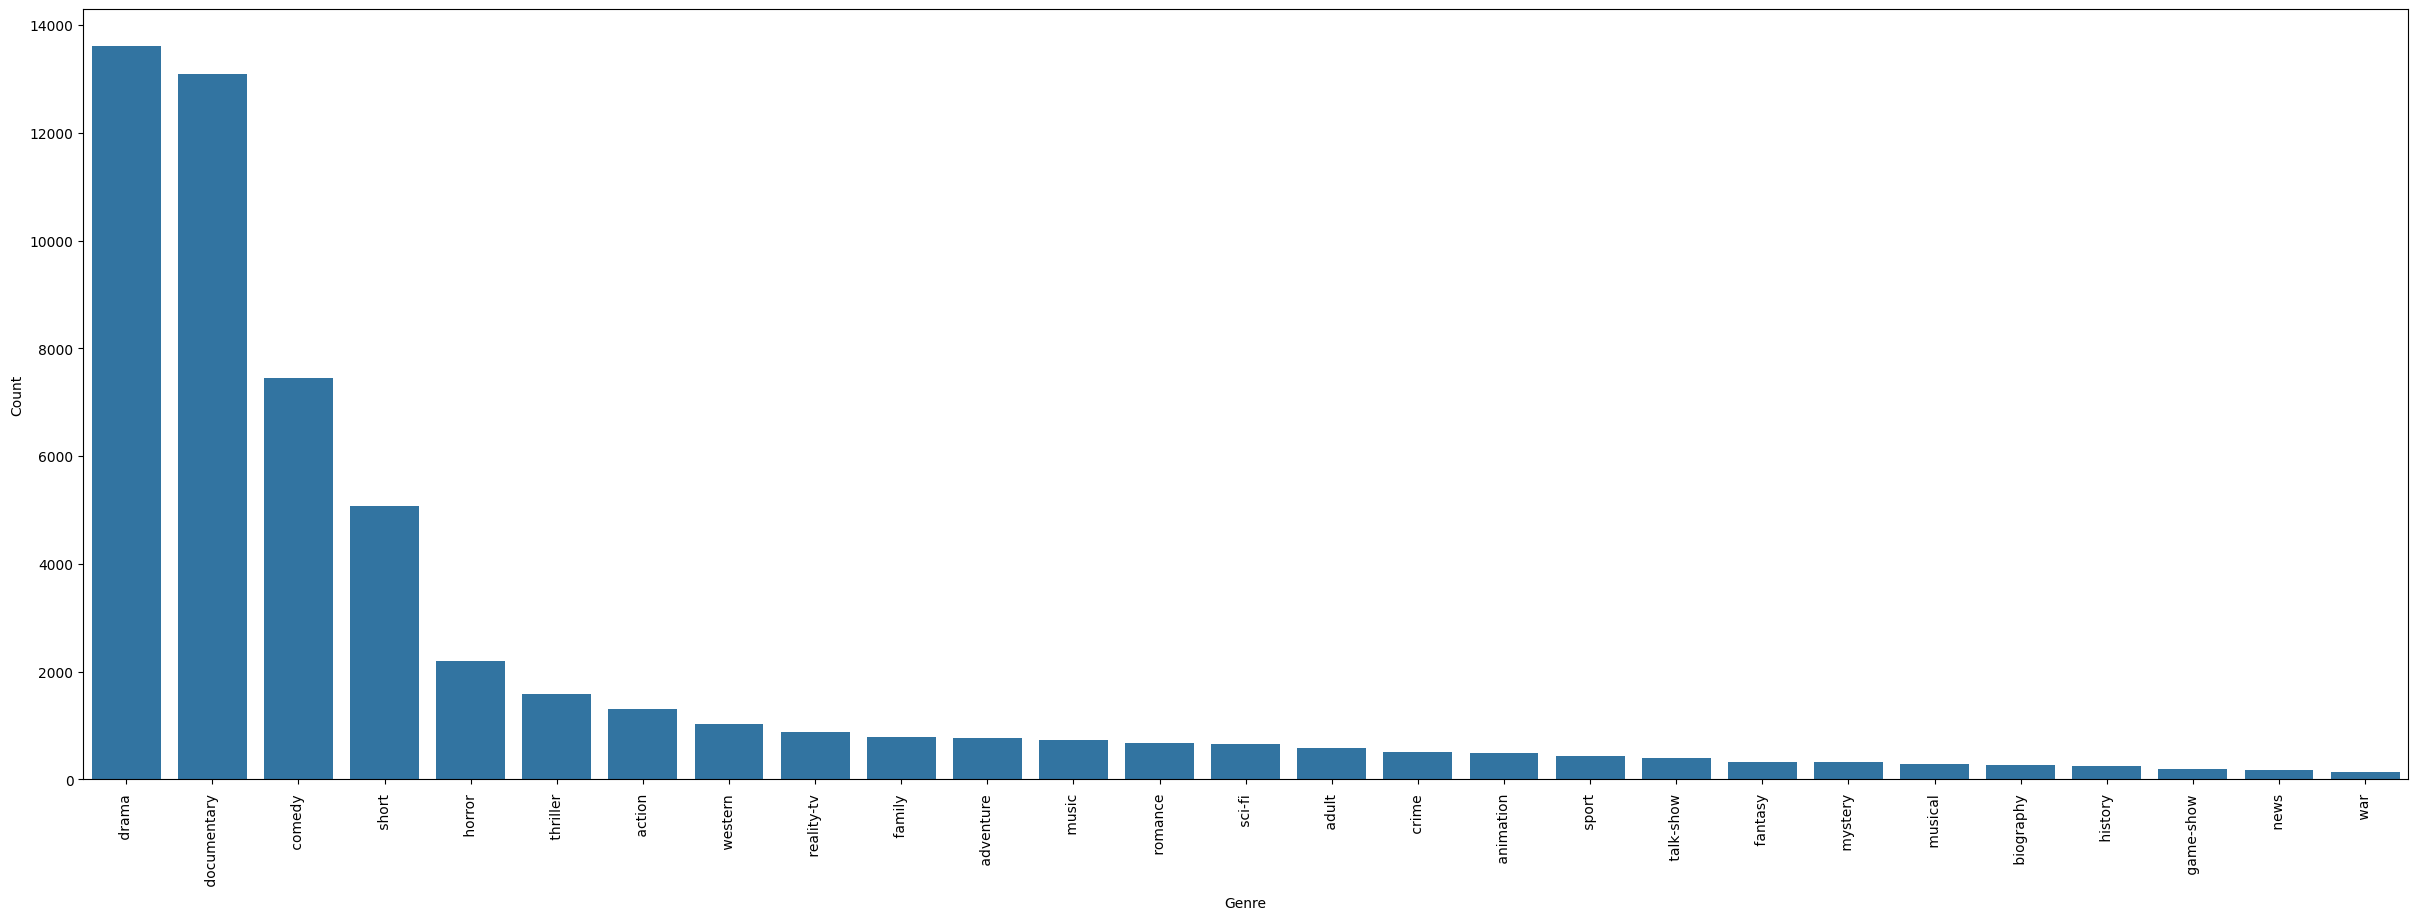

In [16]:
plt.figure(figsize=(30,10))
counts = train_data.genre.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [17]:
train_data.describe()

,title,genre,description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [18]:
train_data.genre.value_counts()

,count
genre,
drama,13613
documentary,13096
comedy,7447
short,5073
horror,2204
thriller,1591
action,1315
western,1032
reality-tv,884


In [19]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [20]:
train_data.isna().sum()

,0
title,0
genre,0
description,0


In [21]:

!pip install nltk
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt') # Download the punkt corpus
nltk.download('stopwords') # Download the stopwords corpus
nltk.download('punkt_tab') # Download the punkt_tab corpus
stop_words = set(stopwords.words('english')) # stop words
def clean_data(text):
    text = text.lower()
    text = re.sub(r'@\S+','',text)                       # [1] remove mentions
    text = re.sub(r'http\S+', '', text)                  # [2] remove urls
    text = re.sub(r'[\w\.-]+@[\w\.-]+',"",text)          # [3] remove emails
    text = re.sub(r"[^a-zA-Z+']", ' ', text)             # [4] keep only english chars / remove numbers
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # [5] remove single chars
    text = re.sub(r'pic.\S+', '',text)                   # [6]
    text = re.sub(r'#', "", text)                        # [7] remove hashtags
    text = re.sub(r"_", "  ", text)                      # [8] remove hashtags
    text = re.sub('\n'," . ",text)                       # [9] remove new lines
    text = re.sub('\[[^]]*\]','',text)                   # [10] remove square prackets
    text = "".join([char for char in text if char not in string.punctuation]) # [11] remove punctuations
    text= re.sub("\s[\s]+", " ",text).strip()            # [12] remove repeated/leading/trailing spaces
    tokens = word_tokenize(text)                         # [13] Tokenize
    text = " ".join([word for word in tokens if word not in stop_words and len(word) > 2]) # [14] remove stop words

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Cleaning the data

In [22]:
train_data['description_cleaned'] = train_data['description'].apply(clean_data)
test_data['description_cleaned'] = test_data['description'].apply(clean_data)

Dimensionality reduction

In [23]:
st = PorterStemmer()
train_data['description_cleaned'] = train_data['description_cleaned'].apply(
    lambda x: ' '.join([st.stem(word) for word in x.split()]))

test_data['description_cleaned'] = test_data['description_cleaned'].apply(
    lambda x: ' '.join([st.stem(word) for word in x.split()]))

In [24]:
train_data['length']=train_data['description'].apply(len)
train_data['length_cleaned']=train_data['description_cleaned'].apply(len)
train_data.head()

,title,genre,description,description_cleaned,length,length_cleaned
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent year old oscar le...,546,339
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...,184,111
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...,650,344
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...,1082,678
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer recov bodi ground zero also st...,625,347


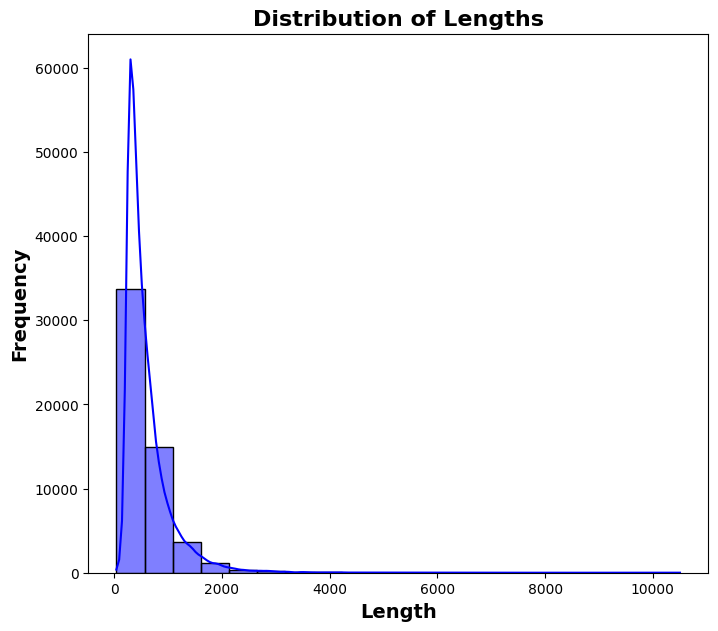

In [26]:
plt.figure(figsize=(8, 7))

sns.histplot(data=train_data, x='length', bins=20, kde=True, color='blue')

plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

The function extracts bigrams from a corpus and returns the top n bigrams sorted by frequency.

In [27]:
def get_top_n_bigram(corpus, n=None):
    vec = CV(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

 creates a barplot to visualize the top 10 most frequent bigrams

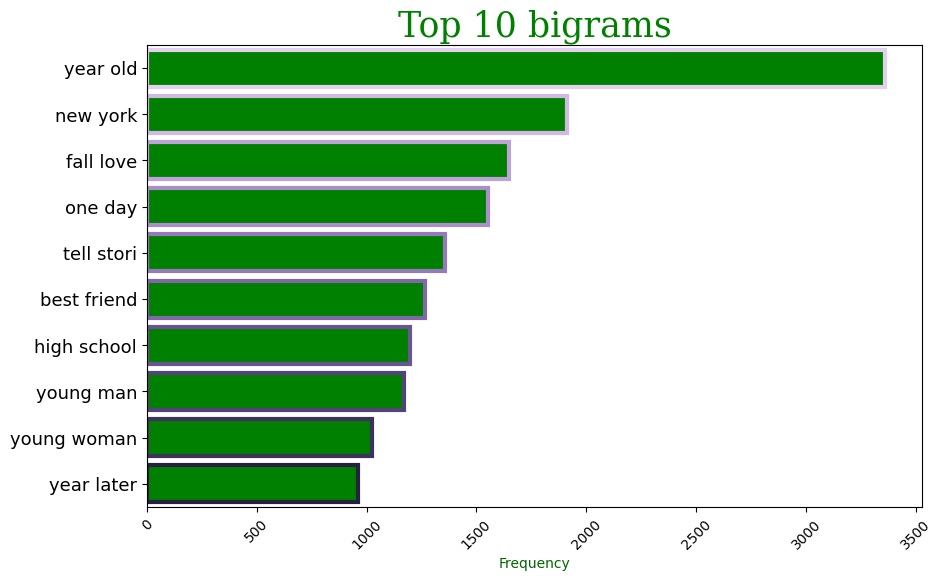

In [30]:
common_words = get_top_n_bigram(train_data['description_cleaned'], 10)
common_words_df = pd.DataFrame(common_words,columns=['word','freq'])
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='freq', y='word', data=common_words_df,facecolor='green',linewidth=3,edgecolor=sns.color_palette("ch:start=3, rot=.1",10))

plt.title("Top 10 bigrams",font='Serif',fontsize=25,color = 'green')
plt.xlabel("Frequency", fontsize=10, color='darkgreen')
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("");

Label Encoding and column selection

In [33]:
le = LabelEncoder()
train_data['genre'] = le.fit_transform(train_data['genre'].values)

# keep only relevent columns
train_df = train_data.loc[:,['description_cleaned', 'genre']]
test_df = test_data.loc[:,['description_cleaned', 'title']]
train_df.head(10)

,description_cleaned,genre
1,listen convers doctor parent year old oscar le...,8
2,brother sister past incestu relationship curre...,24
3,bu empti student field trip museum natur histo...,1
4,help unemploy father make end meet edith twin ...,8
5,film titl refer recov bodi ground zero also st...,8
6,qualiti control consist seri singl take shot f...,7
7,tough econom time max joey run idea discov sen...,5
8,ron petri keanu reev troubl teen whose life ha...,6
9,sudden calamit event caus great loss life dama...,18
10,four high school student embark terrifi journe...,13


In [35]:
train_set, val_set, train_label, val_label = train_test_split(train_df['description_cleaned'], train_data['genre'], test_size=0.2, shuffle=True, random_state=42)
print(f'Split data into train and eval sets')
print(f'Trani Set\t: {len(train_set)}\nValidation Set\t: {len(val_set)}')

Split data into train and eval sets
Trani Set	: 43371
Validation Set	: 10843


In [36]:
# using TF-IDF

vectorize = TfidfVectorizer(stop_words='english', max_features=100000)
train_set_tfidf = vectorize.fit_transform(train_set)
val_set_tfidf = vectorize.transform(val_set)

In [37]:
LR_model = LogisticRegression()
LR_model.fit(train_set_tfidf, train_label)
predict_LR = LR_model.predict(val_set_tfidf)
print(classification_report(val_label, predict_LR))
LR_accuracy = accuracy_score(predict_LR,val_label)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       0.52      0.28      0.37       263
           1       0.82      0.29      0.42       112
           2       0.40      0.12      0.19       139
           3       0.38      0.03      0.05       104
           4       0.00      0.00      0.00        61
           5       0.52      0.58      0.55      1443
           6       0.20      0.02      0.03       107
           7       0.66      0.84      0.74      2659
           8       0.53      0.79      0.64      2697
           9       0.42      0.09      0.15       150
          10       0.00      0.00      0.00        74
          11       0.91      0.50      0.65        40
          12       0.00      0.00      0.00        45
          13       0.66      0.57      0.61       431
          14       0.67      0.46      0.55       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre